In [248]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline

In [6]:
# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

In [12]:
df = pd.read_csv("Auction_export_cleaned")
df.drop(columns = ["Unnamed: 0", "Lot"], inplace = True)

In [14]:
df.head()

,Year,Brand,Model,State,Milage,Price
0,2014,JEEP,GRAND,Michigan,141611.0,3250
1,2014,HONDA,ACCORD,Michigan,262803.0,1425
2,1999,HONDA,CR-V,Michigan,214984.0,425
3,2011,HYUNDAI,SONATA,Michigan,171272.0,900
4,2001,HONDA,CR-V,Michigan,218334.0,500


In [16]:
#changing all categorical values to continuous values
brand_dummies = pd.get_dummies(df.Brand)
State_dummies = pd.get_dummies(df.State)
df["Model_label"] = LabelEncoder().fit_transform(df.Model)

In [20]:
df_1 = pd.concat([df, brand_dummies, State_dummies], axis = 1)

In [22]:
data = df_1.drop(columns = ["Brand", "Model", "State"]).replace(True, 1).replace(False, 0)

In [24]:
data.shape

(1616, 58)

In [26]:
data

,Year,Milage,Price,Model_label,BMW,BUICK,CADILLAC,CHEVROLET,CHRYSLER,DODGE,...,Oregon,Pennsylvania,South Carolina,Tennessee,Texas,Utah,Vermont,Virginia,West Virginia,Wisconsin
0,2014,141611.0,3250,27,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014,262803.0,1425,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1999,214984.0,425,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2011,171272.0,900,45,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2001,218334.0,500,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,2005,185646.0,800,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1612,2013,92205.0,1225,48,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1613,2012,197246.0,625,15,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1614,2003,227957.0,525,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [264]:
X = data.drop(columns = "Price")
y = data.Price

In [266]:
#Splitting the data
x_train, x_test, y_train, y_test = split(X, y, test_size = 0.2, random_state = 10)

In [238]:
#Creating a linear regression Model
Lmodel = make_pipeline(PolynomialFeatures(degree= 1), LinearRegression())

In [240]:
Lmodel.fit(x_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('linearregression', LinearRegression())])

In [242]:
y_pred = Lmodel.predict(x_test)

In [244]:
Lmodel_score = r2_score(y_test, y_pred)
Lmodel_score

0.3220728770756879

In [44]:
Lmodel_MAE = mean_absolute_error(y_test, y_pred)

In [133]:
#Creating a Ridge regression model
Rmodel = Ridge(alpha = 10)
Rmodel.fit(x_train, y_train)

Ridge(alpha=10)

In [129]:
y_pred = Rmodel.predict(x_test)

In [131]:
Rmodel_score = r2_score(y_test, y_pred)
Rmodel_score

0.299361948289545

In [52]:
Rmodel_MAE = mean_absolute_error(y_test, y_pred)

In [54]:
#Creating a random forest regression model
RFmodel = RandomForestRegressor()

In [56]:
RFmodel.fit(x_train, y_train)

RandomForestRegressor()

In [58]:
y_pred = RFmodel.predict(x_test)

In [60]:
RFmodel_score = r2_score(y_test, y_pred)

In [62]:
RFmodel_MAE = mean_absolute_error(y_test, y_pred)

In [64]:
#creating a decision tree regression model
tree_model = DecisionTreeRegressor()

In [66]:
tree_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [68]:
y_pred = tree_model.predict(x_test)

In [70]:
tree_model_score = r2_score(y_test, y_pred)

In [72]:
tree_model_MAE = mean_absolute_error(y_test, y_pred)

In [174]:
#Creating a Gradient Boosting Regression model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state = 10)
gbr.fit(x_train, y_train)

GradientBoostingRegressor(random_state=10)

In [76]:
y_pred = gbr.predict(x_test)

In [78]:
gbr_score = r2_score(y_test, y_pred)

In [80]:
gbr_MAE = mean_absolute_error(y_test, y_pred)

In [82]:
#creating a table for all the regression models and their metrics
table = {
    "Regressor": ["Linear", "Ridge", "Random Forest", "Decision Tree", "Gradient Boosting"],
    "R2 Score": [Lmodel_score, Rmodel_score, RFmodel_score, tree_model_score, gbr_score],
     "MAE": [Lmodel_MAE, Rmodel_MAE, RFmodel_MAE, tree_model_MAE, gbr_MAE]
}

In [84]:
results = pd.DataFrame(table)
results

,Regressor,R2 Score,MAE
0,Linear,0.300526,1601.663208
1,Ridge,0.287892,1548.943490
2,Random Forest,0.623999,925.318688
3,Decision Tree,0.484528,1108.428218
4,Gradient Boosting,0.673751,813.640259


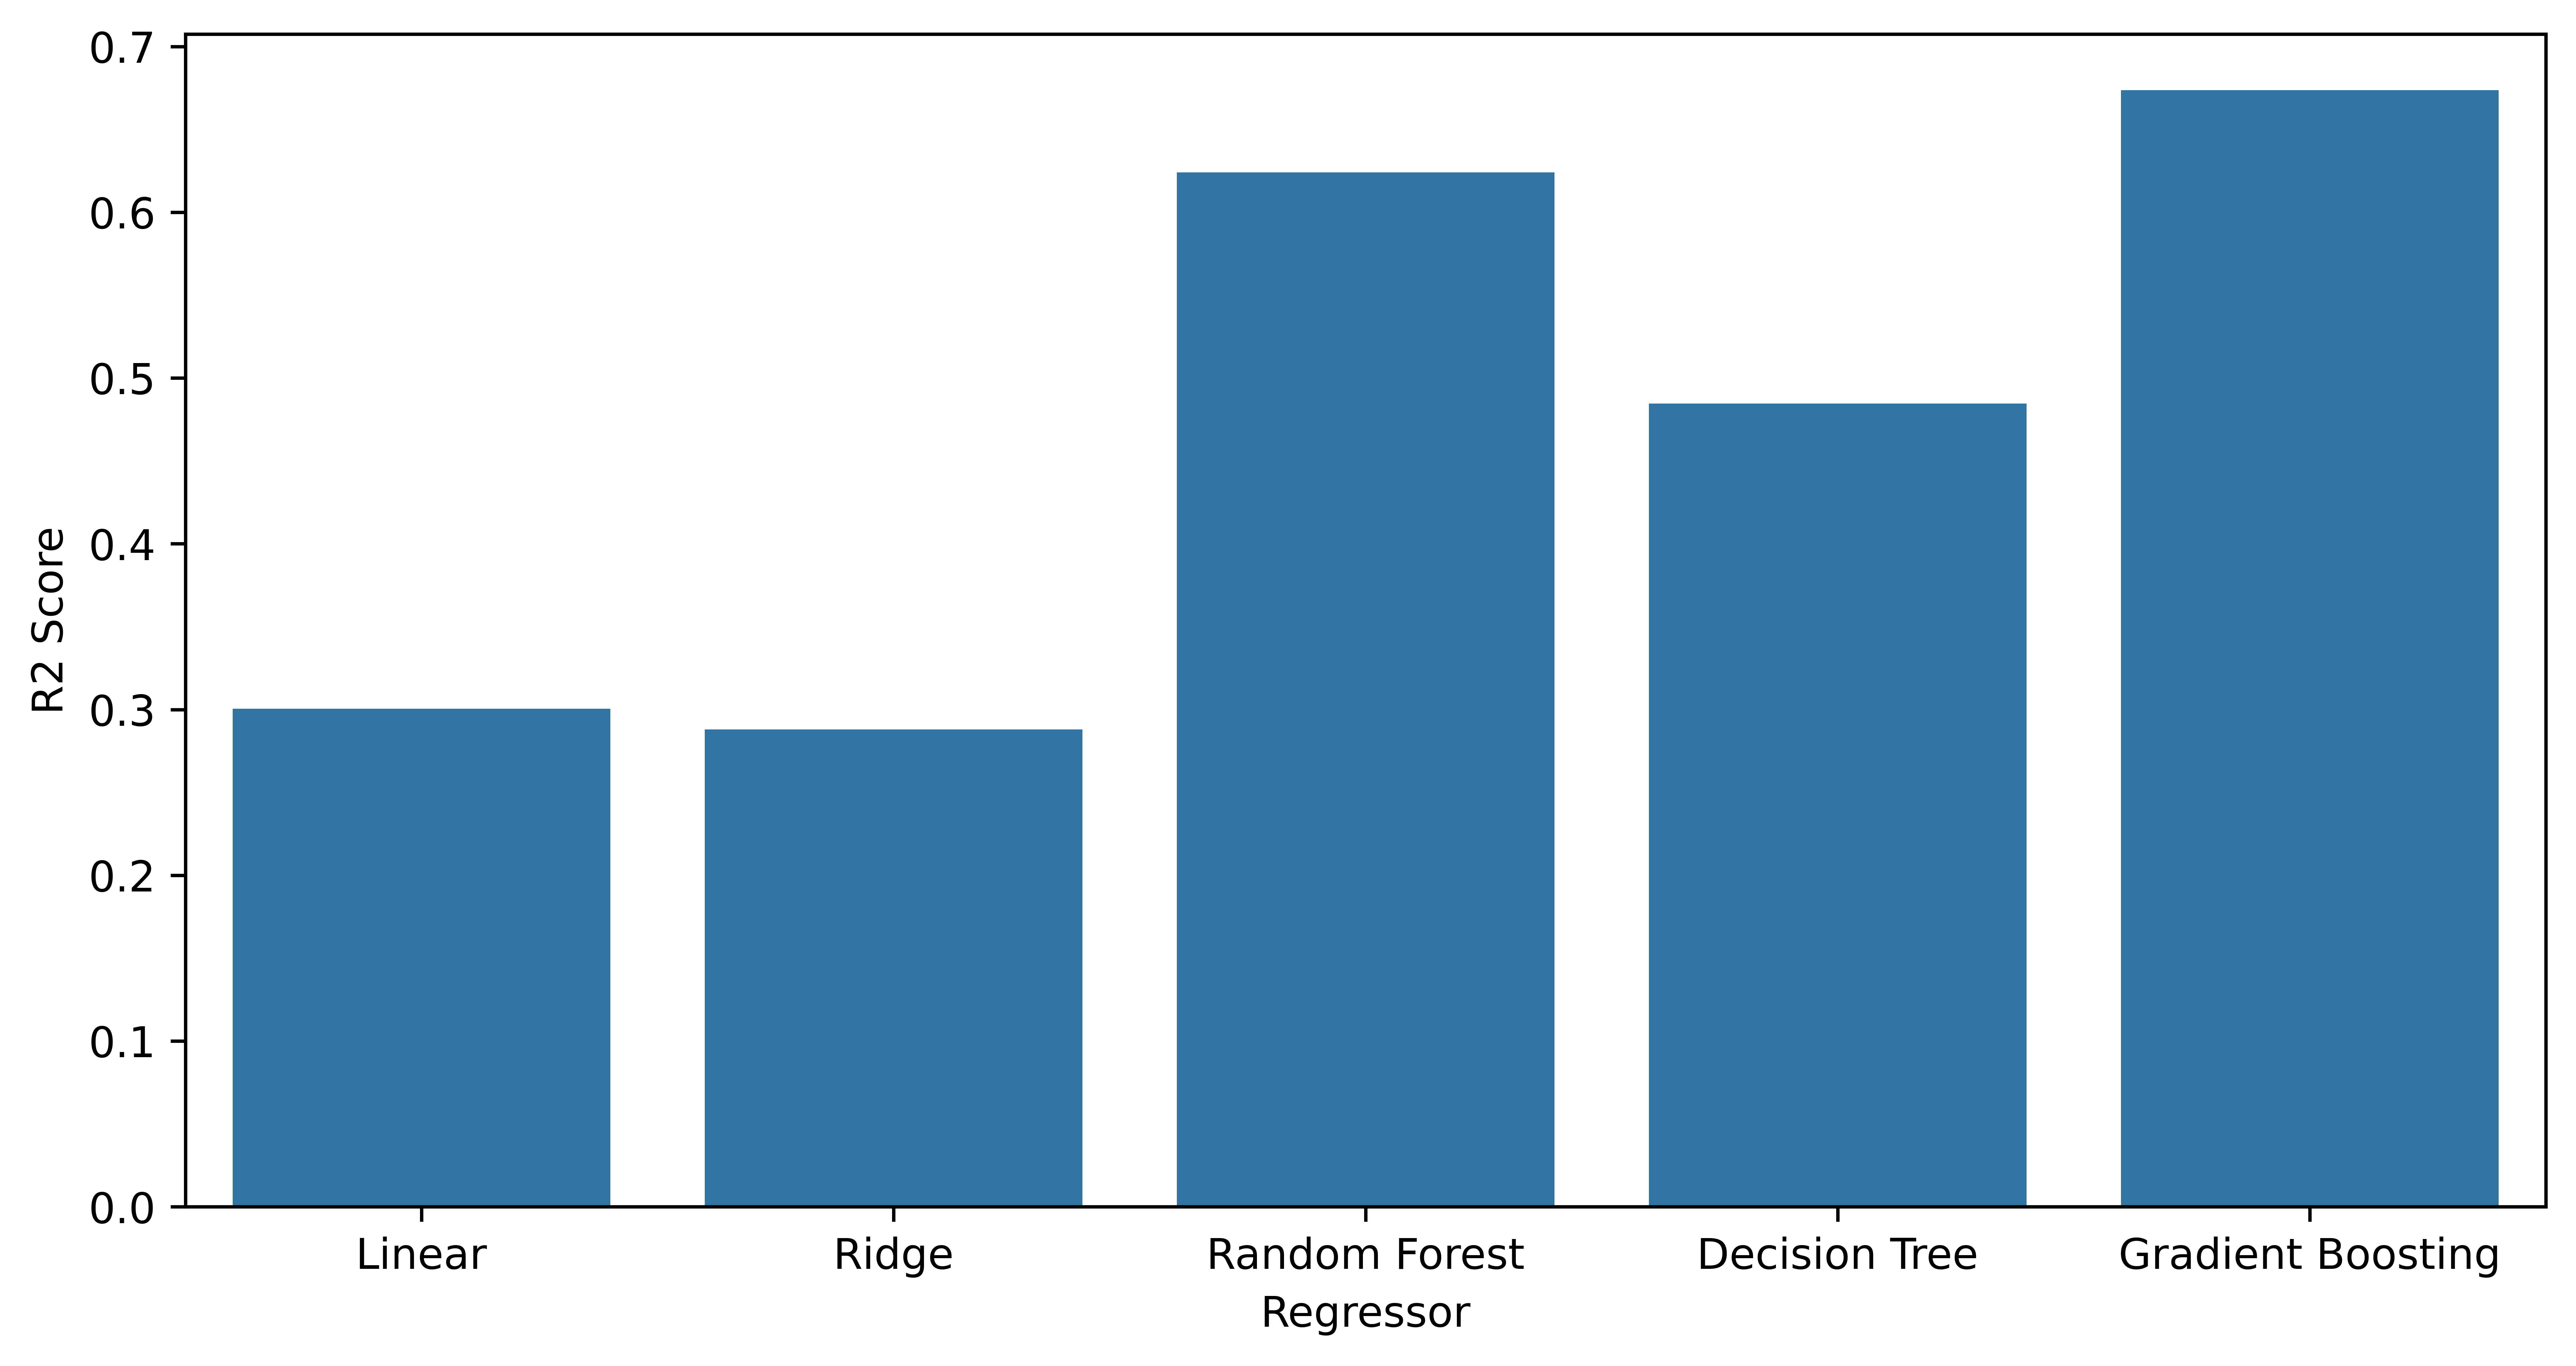

In [86]:
#Analyzing the best performing regression model
plt.figure(figsize = (10, 5), dpi = 1000)
sns.barplot(x = "Regressor", y = "R2 Score", data = results)
plt.savefig("Model Results")
plt.show()

In [268]:
base_learners = [
    ("knn", KNeighborsRegressor(n_neighbors= 15)),
    ("lr", LinearRegression()),
    ("gbr", GradientBoostingRegressor(n_estimators = 100, learning_rate=0.1)),
    ("ada", AdaBoostRegressor(n_estimators = 100, learning_rate=0.1, random_state= 42)),
    ("RF", RandomForestRegressor(n_estimators = 100, bootstrap= False))
]
stacking = StackingRegressor(estimators = base_learners, final_estimator= Ridge(alpha = 10))
stacking.fit(x_train, y_train)

StackingRegressor(estimators=[('knn', KNeighborsRegressor(n_neighbors=15)),
                              ('lr', LinearRegression()),
                              ('gbr', GradientBoostingRegressor()),
                              ('ada',
                               AdaBoostRegressor(learning_rate=0.1,
                                                 n_estimators=100,
                                                 random_state=42)),
                              ('RF', RandomForestRegressor(bootstrap=False))],
                  final_estimator=Ridge(alpha=10))

In [270]:
y_pred = stacking.predict(x_test)

In [272]:
stacking_score = r2_score(y_test, y_pred)
stacking_score

0.7114810278315855

In [654]:
#Saving the model
with open("Prediction Model", "wb") as f:
    pickle.dump(RFmodel, f)